#                         MACHINE LEARNING MINI-PROJECT

# Project Name:- Apply ML Algorithms On Pima Indians Diabetes Dataset

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv")
df.head()
#This are the libraries we are going to use we extracted  the dataset which is in raw using pandas
##pandas is the python frame work which is for analyze data.

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [2]:
df.shape
## shape is nothing but size or rows*columns

(767, 9)

In [3]:
df["1"].count()

767

In [4]:
df.rename(columns={'6':'Pregnancies','148':'Glucose','72':'BloodPressure','35':'SkinThickness','0':'Insulin','33.6':'BMI','0.627':'DiabetesPedigreeFunction','50':'Age','1':'target'},inplace=True)
df.tail()
#here target indicates whether the person is suffering from diabetis or not 1 meaning the person is suffering from diabetis
#0 meaning the person is not having the diabetis
#Here we replaced the features and targets with the respective names

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1
766,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df.isnull().sum()
##checking whether null values present or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
target                      0
dtype: int64

In [6]:
df.describe()
#1. Number of times pregnant
#2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
#3. Diastolic blood pressure (mm Hg)
#4. Triceps skin fold thickness (mm)
#5. 2-Hour serum insulin (mu U/ml)
#6. Body mass index (weight in kg/(height in m)^2)
#7. Diabetes pedigree function
#8. Age (years)
#9. Class variable (0 or 1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dia1 = df[df.target==1]
dia0 = df[df.target==0]
dia1.shape,dia0.shape

((267, 9), (500, 9))

<AxesSubplot:>

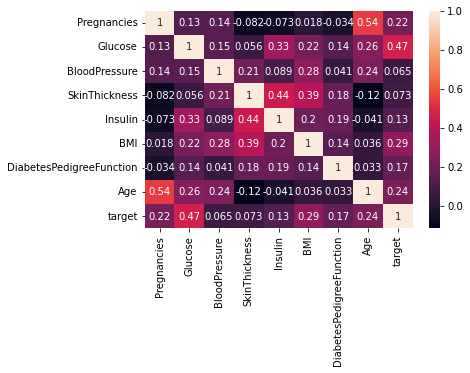

In [8]:
#The correlation matrix is an important tool to understand the correlation between the different characteristics. 
##Mostly greater the the greater the age or the BMI of a patient is, the greater probabilities are the patient can develop  diabetes.

sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

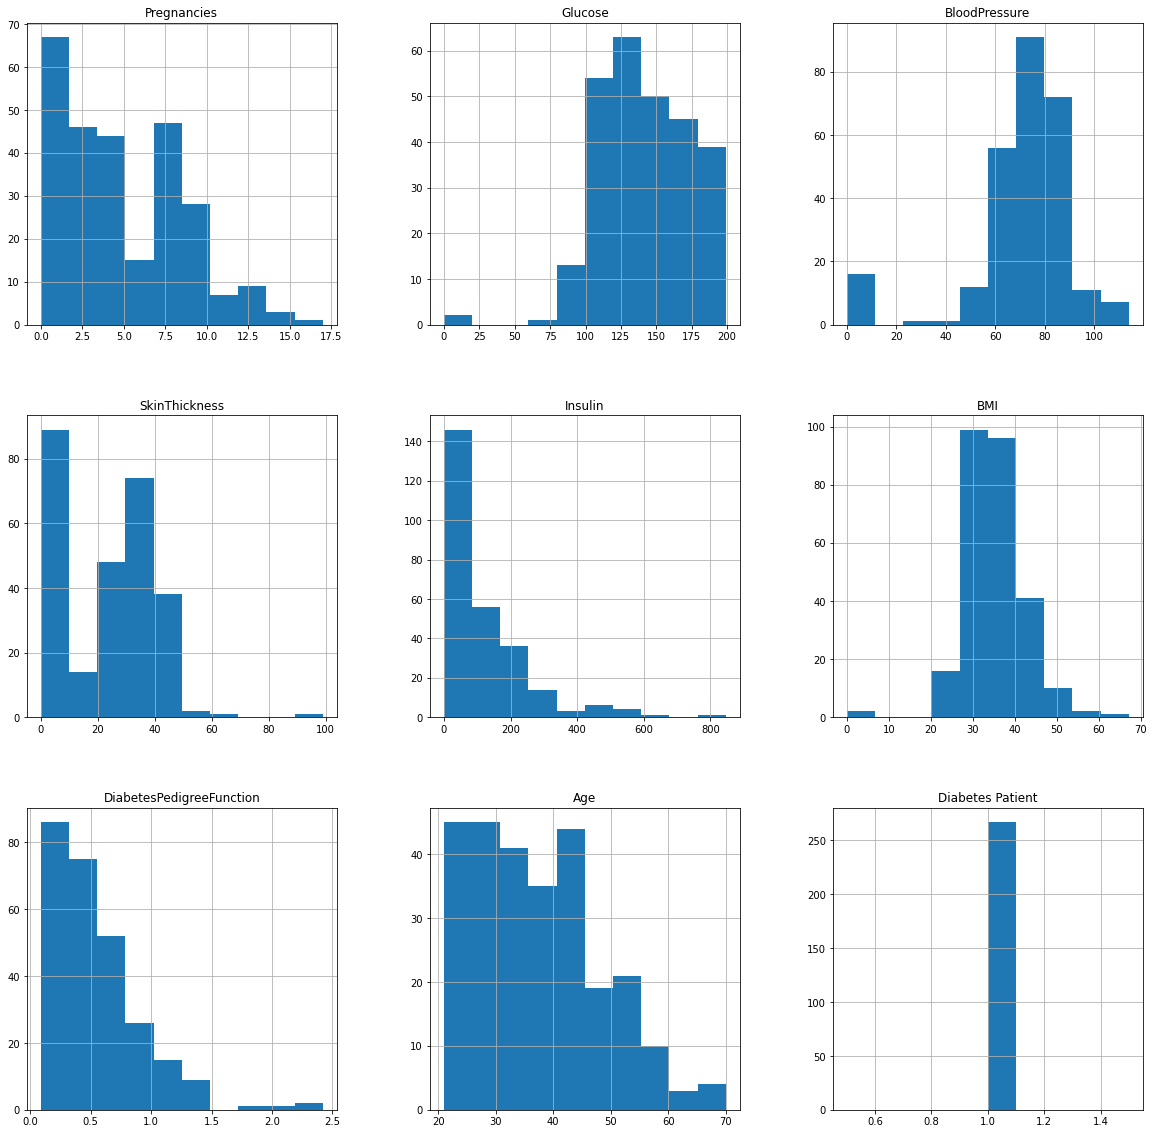

In [25]:
p = df[df['target']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')
## here we are plotting histogram for all the diabetis features present in the dataset

In [10]:
x = df[['Pregnancies', 'Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']]
y= df['target']

In [11]:
x.shape,y.shape

((767, 8), (767,))

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(  x, y, test_size=0.3, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
knn.score(x_train,y_train)

0.8022388059701493

In [15]:
y_pred = knn.predict(x_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       159
           1       0.53      0.54      0.53        72

    accuracy                           0.71       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.71      0.71      0.71       231



In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
model.score(x_train,y_train)

1.0

In [18]:
Xt, Xcv, Yt, Ycv = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

[Text(0.45321800595238093, 0.9642857142857143, 'X[1] <= 127.5\ngini = 0.463\nsamples = 482\nvalue = [307, 175]'),
 Text(0.20647321428571427, 0.8928571428571429, 'X[7] <= 28.5\ngini = 0.321\nsamples = 299\nvalue = [239, 60]'),
 Text(0.06845238095238096, 0.8214285714285714, 'X[5] <= 30.9\ngini = 0.169\nsamples = 161\nvalue = [146, 15]'),
 Text(0.05654761904761905, 0.75, 'gini = 0.0\nsamples = 82\nvalue = [82, 0]'),
 Text(0.08035714285714286, 0.75, 'X[3] <= 5.5\ngini = 0.308\nsamples = 79\nvalue = [64, 15]'),
 Text(0.023809523809523808, 0.6785714285714286, 'X[1] <= 109.5\ngini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.011904761904761904, 0.6071428571428571, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.03571428571428571, 0.6071428571428571, 'X[5] <= 31.95\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.023809523809523808, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.047619047619047616, 0.5357142857142857, 'gini = 0.0\nsamples = 5\nvalue = [0, 

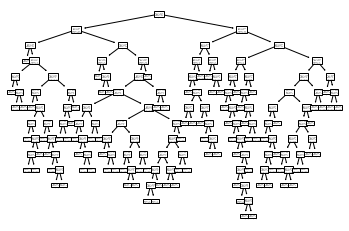

In [19]:
dia_clf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
dia_clf.fit(Xt, Yt)
tree.plot_tree(dia_clf)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
##logistic regression is an supervised machine learning algo it comes under classification algo 
#and is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal

C:\Users\Chinitha Teja\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
##now we are trying to find the accuracy of the data set using score function
model.score(x_train,y_train)

0.7742537313432836

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [23]:
clf.score(x_train,y_train)

0.7555970149253731

[[124  35]
 [ 33  39]]


<AxesSubplot:>

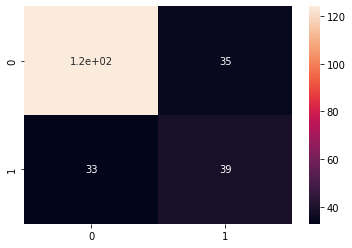

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
### matrix used to determine the performance of the classification models for a given set of test data.
##It measures the performance of our Machine Learning classification model and looks like a table-like structure.

In [39]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("newhyd.json","w") as f:
    f.write(json.dumps(columns))

In [41]:
import pickle
with open('ml_miniProject.pickle','wb') as f:
    pickle.dump(model,f)